# Queue

In [155]:
from multiprocessing import Queue

q = Queue()
#put items at the end of the queue
for x in range(4):
    q.put("item-" + str(x))
print("Queue empty: {}".format(q.empty()))


#remove items from the head of the queue
while not q.empty():
    print q.get()

Queue empty: True
item-0
item-1
item-2
item-3


In [172]:
qu = Queue()
for x in range(4):
    qu.put(x)
print("Queue empty: {}".format(qu.empty()))
while not qu.empty():
    #print qu.get()
    z = qu.get()
    print(z)
print("Queue empty: {}".format(qu.empty()))

Queue empty: False
0
1
2
3
Queue empty: True


##### Example of how to wait for enqueued tasks to be completed:

In [211]:
from threading import Thread

def worker():
    #while True:
    item = q.get()
    print(item)
    #q.task_done()

q = Queue()

for item in range(4):
    q.put(item) 
print("Queue empty: {}".format(q.empty()))    
#print("Queue size: {}".format(q.qsize()))    

 
for i in range(4):
    t = Thread(target=worker)
    t.daemon = True
    t.start()

#q.join()       # block until all tasks are done

Queue empty: False
0
1
2
3


As per the documentation, neither empty(), full(), nor qsize() are reliable.

Alternatives includes:

Reading the exact amount of items going through the Queue:

This is useful if you know beforehand how many items must be processed in total or how many will be processed by each thread.



In [212]:
q = Queue()

for item in range(4):
    q.put(item) 

for item in range(4):
    print q.get(item) 


0
1
2
3


In [215]:
q = Queue()


for item in range(4):
    q.put(item) 
    
q = Queue()   #q.clear()  # Clear Queue
 
for item in range(1):
    print q.get(item) 

Empty: 

# Graph

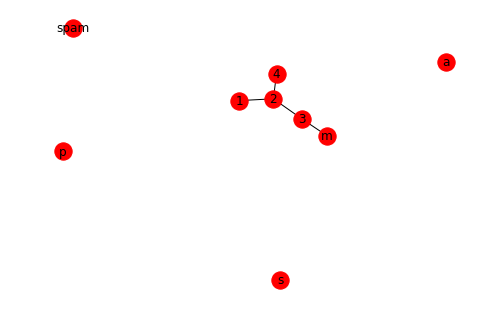

In [98]:
import networkx as nx
G = nx.Graph()
G.add_edges_from([(4, 2), (2, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')
nx.draw(G, with_labels = True)

In [99]:
G.number_of_nodes()

9

In [100]:
G.number_of_edges()

4

In [101]:
list(G.nodes)

['a', 1, 2, 3, 4, 'spam', 'm', 'p', 's']

In [102]:
list(G.edges)

[(1, 2), (2, 3), (2, 4), (3, 'm')]

In [103]:
print(list(G.adj[1]))
print(list(G.adj[2]))
print(list(G.neighbors(2)))
print(G[2])  # same as G.adj[1]
print(G[2][1])

[2]
[1, 3, 4]
[1, 3, 4]
{1: {}, 3: {}, 4: {}}
{}


In [104]:
print(G.degree[1])
print(G.degree[2])

1
3


In [105]:
G.edges([4, 1, 'm'])

EdgeDataView([(4, 2), (1, 2), ('m', 3)])

In [106]:
G.degree([2, 3, 'm'])

DegreeView({2: 3, 3: 2, 'm': 1})

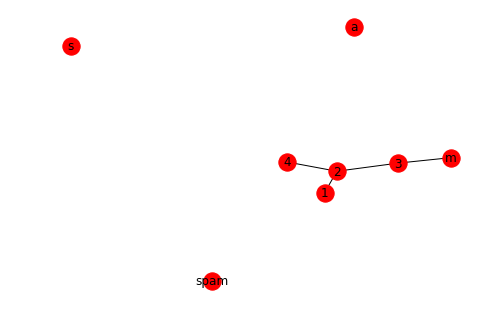

In [107]:
G.remove_node('p')
nx.draw(G, with_labels = True)

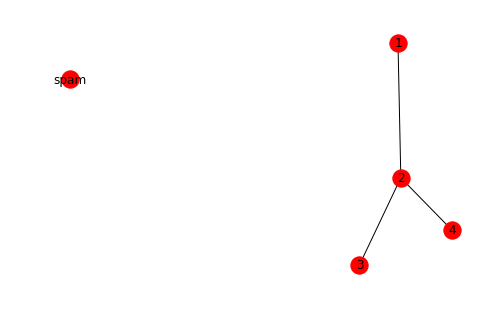

In [108]:
G.remove_nodes_from("spam")
nx.draw(G, with_labels = True)

In [109]:
list(G.nodes)

[1, 2, 3, 4, 'spam']

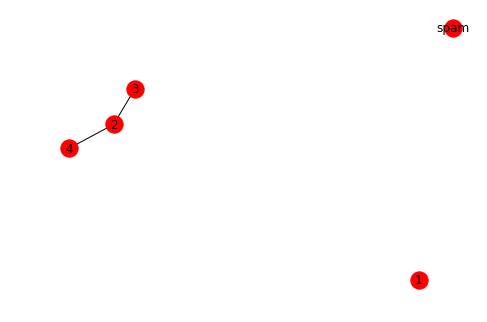

In [110]:
G.remove_edge(1, 2)
nx.draw(G, with_labels = True)

[(1, 2), (2, 1), (2, 3), (2, 4), (3, 2), (4, 2)]


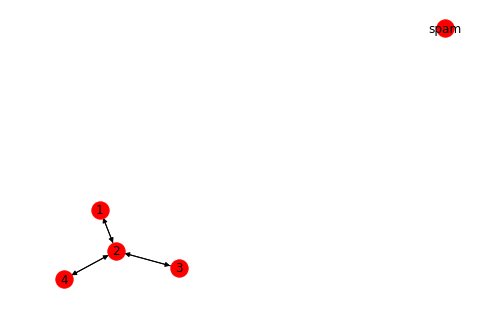

In [111]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
nx.draw(H, with_labels = True)
print(list(H.edges()))

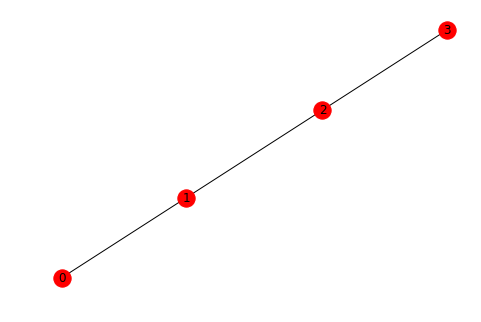

In [112]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)
nx.draw(H, with_labels = True)

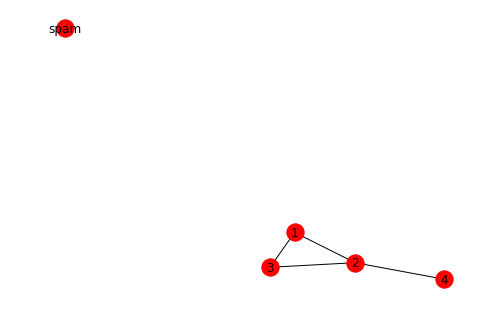

In [113]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
nx.draw(G, with_labels = True)

In [114]:
print(G.edges[1, 3]['color'])
G.edges[1, 3]['color'] = "red"
print(G.edges[1, 3]['color'])

blue
red


[(1, AtlasView({2: {'weight': 0.125}, 3: {'weight': 0.75}})), (2, AtlasView({1: {'weight': 0.125}, 4: {'weight': 1.2}})), (3, AtlasView({1: {'weight': 0.75}, 4: {'weight': 0.375}})), (4, AtlasView({2: {'weight': 1.2}, 3: {'weight': 0.375}}))]


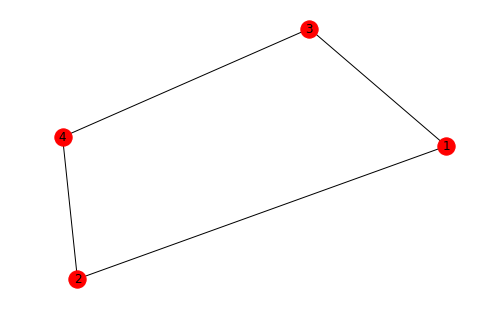

In [115]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
nx.draw(FG, with_labels = True)
print(FG.adj.items())

In [116]:
nx.shortest_path(FG, 1, 4)

[1, 2, 4]

In [117]:
for n, nbrs in FG.adj.items():
...    for nbr, eattr in nbrs.items():
...        wt = eattr['weight']
...        if wt < 0.5: print('(%d, %d, %.3f)' % (n, nbr, wt))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [118]:
print(FG.edges.data('weight'))
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5: print('(%d, %d, %.3f)' % (u, v, wt))

[(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)]
(1, 2, 0.125)
(3, 4, 0.375)


### Graph attributes

{'day': 'Friday'}

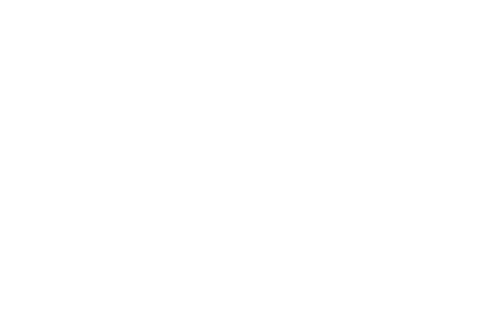

In [119]:
G = nx.Graph(day="Friday")
nx.draw(G, with_labels = True)
G.graph

In [120]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

### Node attributes

{'time': '5pm'}

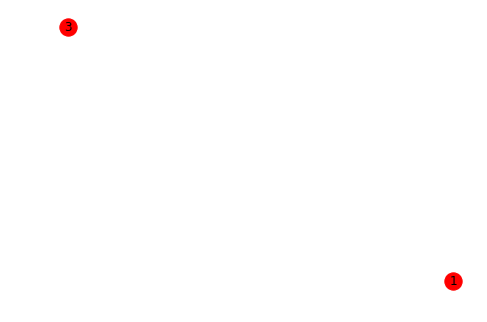

In [121]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
nx.draw(G, with_labels = True)
G.nodes[1]

In [122]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'room': 714, 'time': '5pm'}, 3: {'time': '2pm'}})

In [173]:
G = nx.Graph()
edges = [(0, 1), (0, 2), (2, 3), (1, 3), (3, 4), (3, 5), (4, 5), (2, 5)]
G.add_edges_from(edges)
for node in list(G.nodes):
    G.nodes[node]['layer'] = float('inf')
G.nodes.data()

NodeDataView({0: {'layer': inf}, 1: {'layer': inf}, 2: {'layer': inf}, 3: {'layer': inf}, 4: {'layer': inf}, 5: {'layer': inf}})

### Edge Attributes

{'color': 'blue', 'weight': 5.5}
{'color': 'red'}
[(1, {'room': 714, 'time': '5pm'}), (2, {}), (3, {'time': '2pm'}), (4, {}), (5, {})]
[(1, 2, {'color': 'blue', 'weight': 5.5}), (2, 3, {'weight': 8}), (3, 4, {'color': 'red', 'weight': 4.2}), (4, 5, {'color': 'red'})]


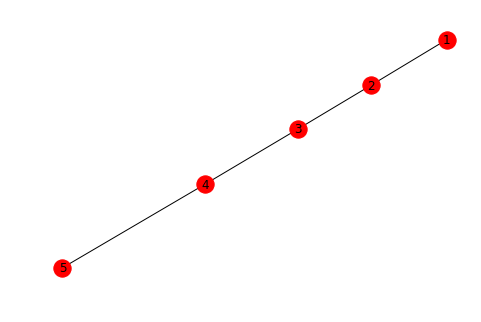

In [123]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 5.5
print(G[1][2])
print(G[4][5])
G.edges[3, 4]['weight'] = 4.2
nx.draw(G, with_labels = True)
print( G.nodes.data() )
print( G.edges.data() )

# Directed graphs

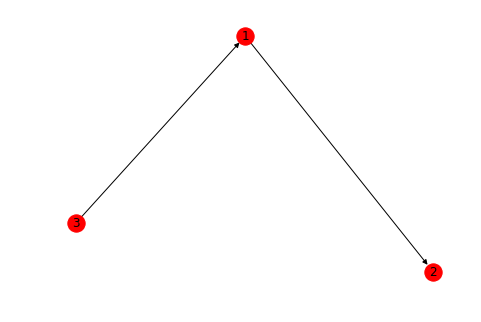

In [124]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
nx.draw(DG, with_labels = True)

In [125]:
DG.out_degree(1, weight='weight')

0.5

In [70]:
DG.degree(1, weight='weight')

1.25

In [71]:
list(DG.successors(1))

[2]

In [72]:
list(DG.neighbors(1))

[2]

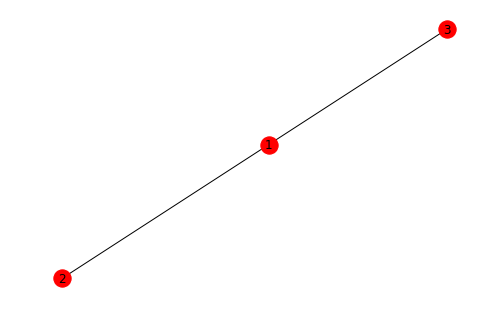

In [74]:
H = nx.Graph(DG)  # convert G to undirected graph
nx.draw(H, with_labels = True)

# Multigraphs
NetworkX provides classes for graphs which allow multiple edges between any pair of nodes. 

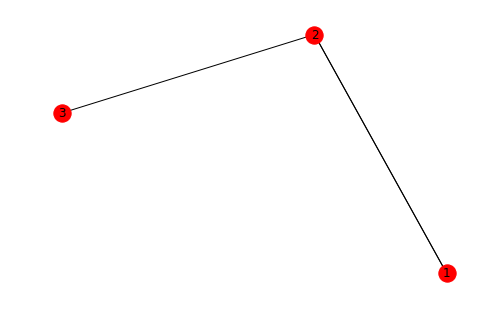

In [75]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
nx.draw(MG, with_labels = True)

In [76]:
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [82]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    print("n: {}  nbrs:{}".format(n, nbrs))
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)
nx.shortest_path(GG, 1, 3)

n: 1  nbrs:{2: {0: {'weight': 0.5}, 1: {'weight': 0.75}}}
n: 2  nbrs:{1: {0: {'weight': 0.5}, 1: {'weight': 0.75}}, 3: {0: {'weight': 0.5}}}
n: 3  nbrs:{2: {0: {'weight': 0.5}}}


[1, 2, 3]